In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [184]:
attribute = ['age','workclass','fnlwgt','education','education-num','marital-status',
             'occupation','relationship','race','sex','capital-gain','capital-loss',
             'hours-per-week','native-country','income']
df = pd.read_table('C:\\Users\\p9514\\Desktop\\adult.data',sep=', ',names=attribute,na_values = '?')
df.dropna(axis=0, how='any', inplace=True)
df = df.drop(columns=['fnlwgt','education-num','relationship','capital-gain','capital-loss'])
#df

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\4060266432.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table('C:\\Users\\p9514\\Desktop\\adult.data',sep=', ',names=attribute,na_values = '?')


In [185]:
workclassMapping = {            #維度過多因此這裡名目型直接做排序
              'Private': 7,
              'Self-emp-not-inc': 6,
              'Self-emp-inc': 5,
              'Federal-gov': 4,
              'Local-gov': 3,
              'State-gov': 2,
              'Without-pay': 1,
              'Never-worked': 0,
}
df['workclass'] = df['workclass'].map(workclassMapping)
df

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,2,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,6,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,7,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,7,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,7,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,7,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,7,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,7,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,7,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [186]:
educationMapping = {            #ordinal排序
              'Doctorate': 16,
              'Masters': 15,
              'Bachelors': 14,
              'Some-college': 13,
              'Assoc-voc': 12,
              'Assoc-acdm': 11,
              'Prof-school': 10,
              'HS-grad': 9,
              '12th': 8,
              '11th': 7,
              '10th': 6,
              '9th': 5,
              '7th-8th': 4,
              '5th-6th': 3,
              '1st-4th': 2,
              'Preschool': 1
}
df['education'] = df['education'].map(educationMapping)

In [187]:
occupationMapping = {            #維度過多因此這裡名目型直接做排序
              'Prof-specialty': 13,
              'Craft-repair': 12,
              'Exec-managerial': 11,
              'Adm-clerical': 10,
              'Sales': 9,
              'Other-service': 8,
              'Machine-op-inspct': 7,
              'Transport-moving': 6,
              'Handlers-cleaners': 5,
              'Farming-fishing': 4,
              'Tech-support': 3,
              'Protective-serv': 2,
              'Priv-house-serv': 1,
              'Armed-Forces': 0
}
df['occupation'] = df['occupation'].map(occupationMapping)

In [188]:
sexMapping = {            #二元類別也直接做排序
              'Male': 1,
              'Female': 0
}
df['sex'] = df['sex'].map(sexMapping)

In [189]:
incomeMapping = {            #class attribute
              '>50K': 1,
              '>50K.' : 1,
              '<=50K': 0,
              '<=50K.' : 0
}
df['income'] = df['income'].map(incomeMapping)
#df

In [190]:
data_dum = pd.get_dummies(df['marital-status']) #one-hot處理
df = df.drop('marital-status', 1)
df = pd.concat([data_dum, df], axis=1)
#df

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\1736288466.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('marital-status', 1)


In [191]:
pd.get_dummies(df['race'])
onehot_encoding_race = pd.get_dummies(df['race'], prefix = 'race')
df = df.drop('race', 1)
df = pd.concat([onehot_encoding_race, df], axis=1)

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\786484530.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('race', 1)


In [192]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Non-US'

In [193]:
data_dum = pd.get_dummies(df['native-country']) #one-hot處理
df = df.drop('native-country', 1)
df = pd.concat([data_dum, df], axis=1)
df

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\345010034.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('native-country', 1)


,Non-US,United-States,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,Divorced,Married-AF-spouse,Married-civ-spouse,...,Never-married,Separated,Widowed,age,workclass,education,occupation,sex,hours-per-week,income
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,39,2,14,10,1,40,0
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,50,6,14,11,1,13,0
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,38,7,9,5,1,40,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,53,7,7,5,1,40,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,0,28,7,14,13,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,0,0,1,0,0,1,...,0,0,0,27,7,11,3,0,38,0
32557,0,1,0,0,0,0,1,0,0,1,...,0,0,0,40,7,9,7,1,40,1
32558,0,1,0,0,0,0,1,0,0,0,...,0,0,1,58,7,9,10,0,40,0
32559,0,1,0,0,0,0,1,0,0,0,...,1,0,0,22,7,9,10,1,20,0


In [194]:
y_train=df['hours-per-week']
df = df.drop('hours-per-week', 1)


C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\924469962.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('hours-per-week', 1)


In [195]:
#訓練集標準化
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_MinMax = pd.DataFrame(data=scaled_features)
print(df_MinMax)

        0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
30157  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
30158  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
30159  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
30160  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
30161  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

             14        15        16        17   18 

In [196]:
test = pd.read_table('C:\\Users\\p9514\\Desktop\\adult.test',sep=', ',names=attribute,na_values = '?')
test = test.drop(columns=['fnlwgt','education-num','relationship','capital-gain','capital-loss'])
test.dropna(axis=0, how='any', inplace=True)
test=test.dropna()
test

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\2634697475.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_table('C:\\Users\\p9514\\Desktop\\adult.test',sep=', ',names=attribute,na_values = '?')


,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
1,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40.0,United-States,<=50K.
2,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50.0,United-States,<=50K.
3,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40.0,United-States,>50K.
4,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40.0,United-States,>50K.
6,34,Private,10th,Never-married,Other-service,White,Male,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,Bachelors,Never-married,Prof-specialty,White,Male,40.0,United-States,<=50K.
16277,39,Private,Bachelors,Divorced,Prof-specialty,White,Female,36.0,United-States,<=50K.
16279,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,50.0,United-States,<=50K.
16280,44,Private,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40.0,United-States,<=50K.


In [197]:
workclassMapping = {            #維度過多因此這裡名目型直接做排序
              'Private': 7,
              'Self-emp-not-inc': 6,
              'Self-emp-inc': 5,
              'Federal-gov': 4,
              'Local-gov': 3,
              'State-gov': 2,
              'Without-pay': 1,
              'Never-worked': 0,
}
test['workclass'] = test['workclass'].map(workclassMapping)
test

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
1,25,7,11th,Never-married,Machine-op-inspct,Black,Male,40.0,United-States,<=50K.
2,38,7,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50.0,United-States,<=50K.
3,28,3,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40.0,United-States,>50K.
4,44,7,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40.0,United-States,>50K.
6,34,7,10th,Never-married,Other-service,White,Male,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...
16276,33,7,Bachelors,Never-married,Prof-specialty,White,Male,40.0,United-States,<=50K.
16277,39,7,Bachelors,Divorced,Prof-specialty,White,Female,36.0,United-States,<=50K.
16279,38,7,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,50.0,United-States,<=50K.
16280,44,7,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40.0,United-States,<=50K.


In [198]:
educationMapping = {            #ordinal排序
              'Doctorate': 16,
              'Masters': 15,
              'Bachelors': 14,
              'Some-college': 13,
              'Assoc-voc': 12,
              'Assoc-acdm': 11,
              'Prof-school': 10,
              'HS-grad': 9,
              '12th': 8,
              '11th': 7,
              '10th': 6,
              '9th': 5,
              '7th-8th': 4,
              '5th-6th': 3,
              '1st-4th': 2,
              'Preschool': 1
}
test['education'] = test['education'].map(educationMapping)
incomeMapping = {            #class attribute
              '>50K': 1,
              '>50K.' : 1,
              '<=50K': 0,
              '<=50K.' : 0
}
occupationMapping = {            #維度過多因此這裡名目型直接做排序
              'Prof-specialty': 13,
              'Craft-repair': 12,
              'Exec-managerial': 11,
              'Adm-clerical': 10,
              'Sales': 9,
              'Other-service': 8,
              'Machine-op-inspct': 7,
              'Transport-moving': 6,
              'Handlers-cleaners': 5,
              'Farming-fishing': 4,
              'Tech-support': 3,
              'Protective-serv': 2,
              'Priv-house-serv': 1,
              'Armed-Forces': 0
}
sexMapping = {            #二元類別也直接做排序
              'Male': 1,
              'Female': 0
}
test['sex'] = test['sex'].map(sexMapping)
test['occupation'] = test['occupation'].map(occupationMapping)
test['income'] = test['income'].map(incomeMapping)

test

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
1,25,7,7,Never-married,7,Black,1,40.0,United-States,0
2,38,7,9,Married-civ-spouse,4,White,1,50.0,United-States,0
3,28,3,11,Married-civ-spouse,2,White,1,40.0,United-States,1
4,44,7,13,Married-civ-spouse,7,Black,1,40.0,United-States,1
6,34,7,6,Never-married,8,White,1,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...
16276,33,7,14,Never-married,13,White,1,40.0,United-States,0
16277,39,7,14,Divorced,13,White,0,36.0,United-States,0
16279,38,7,14,Married-civ-spouse,13,White,1,50.0,United-States,0
16280,44,7,14,Divorced,10,Asian-Pac-Islander,1,40.0,United-States,0


In [199]:
data_dum = pd.get_dummies(test['marital-status']) #one-hot處理
test = test.drop('marital-status', 1)
test = pd.concat([data_dum, test], axis=1)

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\1643377894.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('marital-status', 1)


In [200]:
pd.get_dummies(test['race'])
onehot_encoding_race = pd.get_dummies(test['race'], prefix = 'race')
test = test.drop('race', 1)
test = pd.concat([onehot_encoding_race, test], axis=1)

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\4151411790.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('race', 1)


In [201]:
test.loc[test['native-country'] != 'United-States', 'native-country'] = 'Non-US'
data_dum = pd.get_dummies(test['native-country']) #one-hot處理
test = test.drop('native-country', 1)
test = pd.concat([data_dum, test], axis=1)

y_test=test['hours-per-week']
test = test.drop('hours-per-week', 1)

C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\1744799323.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('native-country', 1)
C:\Users\p9514\AppData\Local\Temp\ipykernel_9552\1744799323.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop('hours-per-week', 1)


In [202]:
test['age'] = test['age'].astype(int)

In [203]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 1 to 16281
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Non-US                   15060 non-null  uint8
 1   United-States            15060 non-null  uint8
 2   race_Amer-Indian-Eskimo  15060 non-null  uint8
 3   race_Asian-Pac-Islander  15060 non-null  uint8
 4   race_Black               15060 non-null  uint8
 5   race_Other               15060 non-null  uint8
 6   race_White               15060 non-null  uint8
 7   Divorced                 15060 non-null  uint8
 8   Married-AF-spouse        15060 non-null  uint8
 9   Married-civ-spouse       15060 non-null  uint8
 10  Married-spouse-absent    15060 non-null  uint8
 11  Never-married            15060 non-null  uint8
 12  Separated                15060 non-null  uint8
 13  Widowed                  15060 non-null  uint8
 14  age                      15060 non-null  int32
 15  wo

In [204]:
#測試集標準化
scaler.fit(test)
scaled_features = scaler.transform(test)
test_MinMax = pd.DataFrame(data=scaled_features)
print(test_MinMax)

        0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3      0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15055  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
15056  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
15057  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
15058  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
15059  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

             14        15        16        17   18 

In [205]:
#定義訓練集和測試集的(X,y)
x_train=df_MinMax
y_train=y_train
x_test=test_MinMax
y_true=y_test.values
y_test

1        40.0
2        50.0
3        40.0
4        40.0
6        30.0
         ... 
16276    40.0
16277    36.0
16279    50.0
16280    40.0
16281    60.0
Name: hours-per-week, Length: 15060, dtype: float64

In [206]:
print("输入數據形狀：", x_train.shape)

输入數據形狀： (30162, 20)


In [207]:
import tensorflow as tf

In [307]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(20))) #輸入層
model.add(tf.keras.layers.Dense(units=128, activation='relu')) #隱藏層
model.add(tf.keras.layers.Dense(units=128, activation='relu')) #隱藏層
model.add(tf.keras.layers.Dense(units=128, activation='relu')) #隱藏層
model.add(tf.keras.layers.Dense(units=128, activation='relu')) #隱藏層
model.add(tf.keras.layers.Dense(units=1,activation='linear'))#輸出層
model.compile(optimizer='adam', loss='mse')

In [308]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'loss'),
]
history = model.fit(x_train, y_train, epochs=100, batch_size=32,callbacks=my_callbacks)

Epoch 1/100
943/943 [==============================] - 2s 1ms/step - loss: 161.2052
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 125.7251
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 124.1908
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 121.2081
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 119.3157
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 117.5439
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 116.3817
Epoch 8/100
943/943 [==============================] - 1s 1ms/step - loss: 115.5008
Epoch 9/100
943/943 [==============================] - 1s 1ms/step - loss: 115.1619
Epoch 10/100
943/943 [==============================] - 1s 1ms/step - loss: 115.1323
Epoch 11/100
943/943 [==============================] - 1s 1ms/step - loss: 115.3408
Epoch 12/100
943/943 [==============================] - 1s 1ms/step - loss

In [229]:
#y_train.max()

In [211]:
model.fit(x_train, y_train, epochs=1, batch_size=64)

472/472 [==============================] - 1s 1ms/step - loss: 119.1218


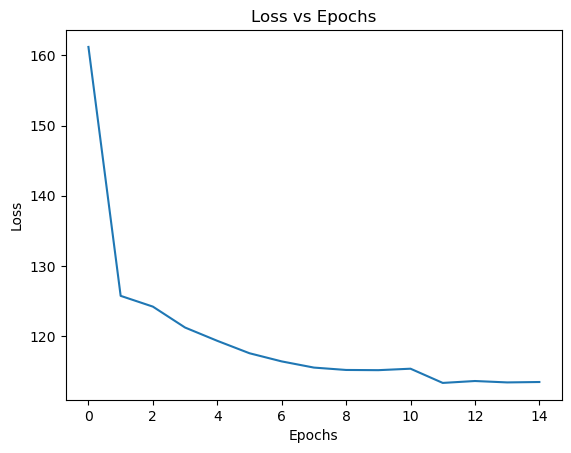

In [309]:
plt.plot(history.history['loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [310]:
y_pred = model.predict(x_test)

471/471 [==============================] - 0s 869us/step


In [312]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test, y_pred)  
mape = mean_absolute_percentage_error(y_test, y_pred)  
rmse = mse*mse
print("mse為:",mse)
print("mape為:",mape)
print("rmse為:",rmse)

mse為: 115.68254931457984
mape為: 0.2628100365334649
rmse為: 13382.452215920197
